# Лабораторная работа № 2
# Чупреева Давида,15-АС
# Вариант 31

In [ ]:
import pandas as pandas
import numpy as numpy
import seaborn as seaborn
import matplotlib.pyplot as plot

from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score

import warnings
warnings.filterwarnings("ignore")
seaborn.set_style('darkgrid')

In [ ]:
headers = ['type', 'alcohol', 'acid', 'ash', 
          'alcalinity', 'magnesium', 'total phenols', 'flavanoids',
          'nonflavanoid phenols', 'proanthocyanins', 'color intensity',
          'hue', 'od280', 'proline']
data_frame = pd.read_csv('wine.data.txt', names = headers) 
data_frame.head()

In [41]:
data_frame.shape

(178, 14)

In [42]:
data_frame.count()

type                    178
alcohol                 178
acid                    178
ash                     178
alcalinity              178
magnesium               178
total phenols           178
flavanoids              178
nonflavanoid phenols    178
proanthocyanins         178
color intensity         178
hue                     178
od280                   178
proline                 178
dtype: int64

# 2. Удалите дубликаты строк в наборе данных

In [ ]:
data_frame = data_frame.drop_duplicates()
data_frame = data_frame.dropna()
data_frame = data_frame.reset_index(drop = True)
data_frame.shape

In [44]:
data_frame.count()

type                    178
alcohol                 178
acid                    178
ash                     178
alcalinity              178
magnesium               178
total phenols           178
flavanoids              178
nonflavanoid phenols    178
proanthocyanins         178
color intensity         178
hue                     178
od280                   178
proline                 178
dtype: int64

In [45]:
data_frame.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

In [ ]:
seaborn.countplot(data = data_frame, y = 'type')
plot.show()

# 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 

In [47]:
numerical_columns = [i for i in data_frame.columns if data_frame[i].dtype.name != 'object']
categorial_columns = [i for i in data_frame.columns if data_frame[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['alcohol', 'acid', 'ash', 'alcalinity', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'od280', 'proline']
categorial:  ['type']


In [48]:
data_frame['type'] = data_frame['type'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in data_frame.columns if data_frame[i].dtype.name != 'object']
categorial_columns = [i for i in data_frame.columns if data_frame[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['alcohol', 'acid', 'ash', 'alcalinity', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'od280', 'proline']
categorial:  ['type']


In [49]:
scaler = MinMaxScaler()
data_frame[numerical_columns] = scaler.fit_transform(data_frame[numerical_columns])
data_frame.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# 5.Выполните замену категориальных признаков.

In [50]:
label = LabelEncoder() 
data_frame["type"] = label.fit_transform(data_frame["type"])
data_frame.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# 6.Оцените корреляцию между признаками.

In [ ]:
corr = df.corr()
seaborn.heatmap(corr)
plot.show()

# 7.Заполните пропущенные значения в данных

In [63]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
type                    178 non-null int64
alcohol                 178 non-null float64
acid                    178 non-null float64
ash                     178 non-null float64
alcalinity              178 non-null float64
magnesium               178 non-null float64
total phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid phenols    178 non-null float64
proanthocyanins         178 non-null float64
color intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null float64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [ ]:
Пропущенных значений нет

# 8.Решите поставленную задачу классификации в соответствии с заданием

In [53]:
x = numpy.array(data_frame.drop('type', axis=1))
y = numpy.array(data_frame['type']) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [56]:
radius = RadiusNeighborsClassifier(outlier_label = 3)

params = {'radius': numpy.arange(0, 10, 0.1)}

radius_grid = GridSearchCV(radius, params)
radius_grid.fit(x_train, y_train)

best_radius = radius_grid.best_estimator_.radius
best_score = radius_grid.best_score_
print('best train score - ', best_score, 'at radius:', best_radius)

radius = RadiusNeighborsClassifier(outlier_label = 3, radius = best_radius)
radius.fit(x_train, y_train)
best_score = numpy.mean(y_test == radius.predict(x_test))
print('test score - ', best_score)

best train score: 0.9887640449438202 	 at radius: 0.9
test score:  0.910112359551


In [57]:
decision = DecisionTreeClassifier()

params = {'max_depth': list(range(1,5)), 'max_features': list(range(1,5))}

decision_grid = GridSearchCV(decision, params)
decision_grid.fit(x_train, y_train)

best_features = decision_grid.best_estimator_.max_features
best_depth = decision_grid.best_estimator_.max_depth
best_score = decision_grid.best_score_
print('best train score - ', best_score, 'at features number - ', best_features, 'at depth - ', best_depth)

decision = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)
decision.fit(x_train, y_train)
best_score = numpy.mean(y_test == decision.predict(x_test))
print('test score - ', best_score)

best train score: 0.898876404494382 	 at features number: 4 	 at depth: 3
test score:  0.797752808989


In [58]:
from sklearn.metrics import accuracy_score

classifier = RadiusNeighborsClassifier(radius = 1.1, n_jobs = -1, outlier_label = 3).fit(x_train, y_train)
pred = classifier.predict(x_test)
accuracy_score(y_test, pred)
pred = classifier.radius_neighbors(x_test)[0]
y_test = label_binarize(y_test, classes = [0, 1, 2])

for i in range(len(pred)):
    pred[:][i] = min(pred[:][i]), max(pred[:][i]), numpy.mean(pred[:][i])
pred[:][73]

(0.3013538903431508, 1.0978006859598606, 0.65805343115833226)

In [59]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
        '''
        
        General description. 
        Determines the probability that a test instance matching a class.
        
        Algorithm. 
        We'll go through the zero radius to the double classifier radius
        with the elementary step(dr). If an instance lies along the:
        * Zero raduis+dr - corresponds 100%
        * Classifier raduis+dr - corresponds 50%
        * Double classifier raduis+dr and beyond it - corresponds 0%
        There are intermediate values of percents. Each step corresponds
        to its own percentage value. If predicted instance changes its 
        class, this instance belongs to the current radius and it is 
        assigned the appropriate percentage. 
        
        fit method built-in
        '''
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),3), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1, 2]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=3)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=3)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

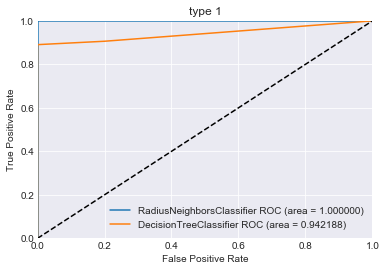

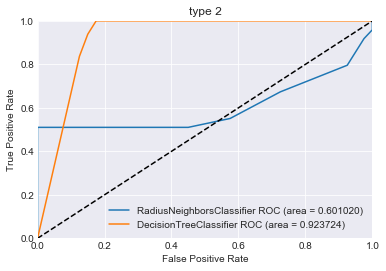

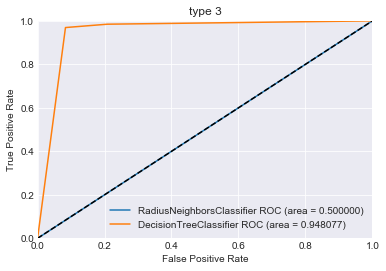

In [60]:
classifier = MyRadiusNeighborsClassifier(outlier_label=3, radius=best_radius)
probas_classifier0 = classifier.predict_proba(x_test, x_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,0], -probas_classifier0[:,0])
roc_auc = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(x_train, y_train).predict_proba(x_test)
tpr, fpr, thresholds = roc_curve(y_test[:,0], -probas_dtc0[:,0])
roc_auc = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plot.plot([0, 1], [0, 1], 'k--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.legend(loc=4, fontsize='medium')
plot.title('type 1')
plot.show()

classifier = MyRadiusNeighborsClassifier(outlier_label=3, radius=best_radius)
probas_classifier1 = classifier.predict_proba(x_test, x_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_classifier0[:,1])
roc_auc = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc1 = dtc.fit(x_train, y_train).predict_proba(x_test)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_dtc0[:,1])
roc_auc = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plot.plot([0, 1], [0, 1], 'k--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.legend(loc=4, fontsize='medium')
plot.title('type 2')
plot.show()

classifier = MyRadiusNeighborsClassifier(outlier_label=3, radius=best_radius)
probas_classifier2 = classifier.predict_proba(x_test, x_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_classifier0[:,2])
roc_auc = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc2 = dtc.fit(x_train, y_train).predict_proba(x_test)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_dtc0[:,2])
roc_auc  = auc(fpr, tpr)
plot.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plot.plot([0, 1], [0, 1], 'k--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.legend(loc=4, fontsize='medium')
plot.title('type 3')
plot.show()

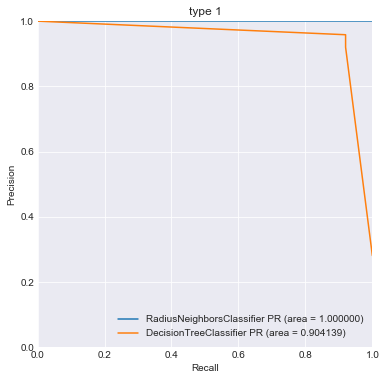

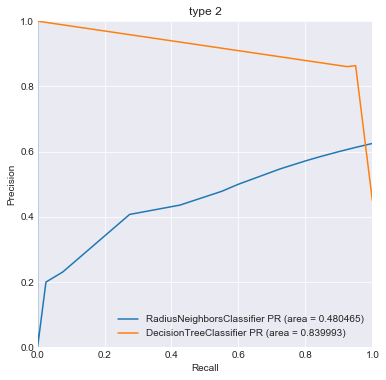

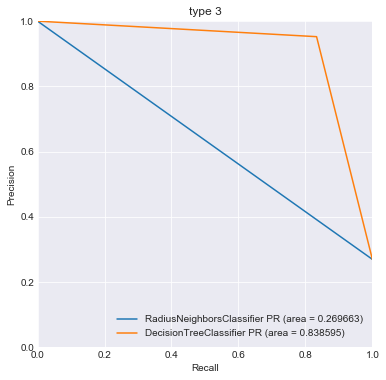

In [61]:
plot.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_mrnc1[:,0])
aps_mrnc1 = average_precision_score(y_test[:,0],probas_mrnc1[:,0])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test[:,0],probas_dtc1[:,0])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plot.xlabel('Recall')
plot.ylabel('Precision')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.legend(loc=4, fontsize='medium')
plot.title('type 1')
plot.show()

plot.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(y_test[:,1],probas_mrnc1[:,1])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test[:,1],probas_dtc1[:,1])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plot.xlabel('Recall')
plot.ylabel('Precision')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.legend(loc=4, fontsize='medium')
plot.title('type 2')
plot.show()

plot.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_mrnc1[:,2])
aps_mrnc1 = average_precision_score(y_test[:,2],probas_mrnc1[:,2])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_dtc1[:,2])
aps_dtc1 = average_precision_score(y_test[:,2],probas_dtc1[:,2])
plot.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plot.xlabel('Recall')
plot.ylabel('Precision')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.0])
plot.legend(loc=4, fontsize='medium')
plot.title('type 3')
plot.show()